In [39]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [31]:
def get_img_info(img_path):
    with Image.open(img_path) as img:
        w, h = img.size  # width, height
        return {
            "format": img.format,
            "h": h,
            "w": w,
            "mode": img.mode,
        }

In [ ]:
def letterbox(img: Image.Image, new_size: int) -> np.ndarray:
    w, h = img.size
    scale = new_size / max(w, h)
    new_w, new_h = int(w * scale), int(h * scale)
    img_resized = cv2.resize(np.array(img), (new_w, new_h))
    padded = np.full((new_size, new_size, 3), 114, dtype=np.uint8)
    padded[:new_h, :new_w] = img_resized
    return padded

Padded image shape: (640, 640, 3)


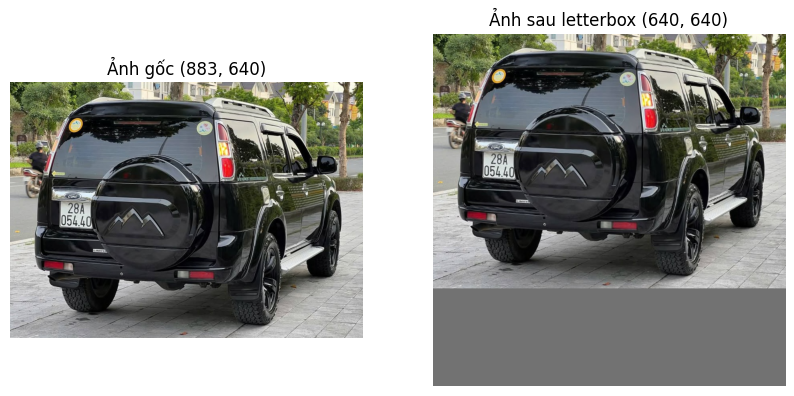

In [45]:
if __name__ == "__main__":
    img_path = "/Users/ducanh/Desktop/Python/data/img/crop_0a8b2131ba5b40bc9a1bb4011336e56a.jpg"
    img = Image.open(img_path)
    padded = letterbox(img, 640)
    print(f"Padded image shape: {padded.shape}")
    
    # Hiển thị ảnh gốc và sau letterbox
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img)
    ax[0].set_title(f"Ảnh gốc {img.size}")
    ax[0].axis('off')
    ax[1].imshow(padded)
    ax[1].set_title(f"Ảnh sau letterbox {padded.shape[:2]}")
    ax[1].axis('off')
    plt.show()